# 1. Giới thiệu chung

Một trong những xu hướng nghiên cứu thu hút được đông đảo các nhà khoa học, có tính ứng dụng cao và phát triển mạnh mẽ trong những năm gần đây trong Deep Learning có lẽ là GAN. Chính vì thế bài viết này mình sẽ giới thiệu về GAN, các ứng dụng, kiến trúc thuật toán và phương pháp huấn luyện theo hướng tiếp cận đơn giản nhất, dựa trên kiến trúc GAN đầu tiên được Ian GoodFellow giới thiệu vào năm 2014, để dễ hiểu hơn cho người bắt đầu. Các kiến trúc GAN nâng cao hơn sẽ được mình trình bày ở các bài sau. Những kiến trúc này vẫn dựa trên ý tưởng chủ đạo của model GAN đầu tiên nhưng có sự cải tiến đầu vào, phương pháp huấn luyện, hàm loss function một chút để kết quả học được tốt hơn.



## 1.1. GAN và các ứng dụng



Về các ứng dụng của GAN các bạn có thể tham khảo ở rất nhiều trang khác nhau như [18 ứng dụng của GAN - machine learning mastery](https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/). Mình có thể liệt kê ra một số ứng dụng tiêu biểu:

1. Tạo ra khuôn mặt người:

GAN có khả năng tạo ra những khuôn mặt nhân tạo mà _rất khó_ phân biệt với người thật. Chất lượng của những model GAN áp dụng trên khuôn mặt ngày càng tốt hơn qua từng năm.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-the-Progression-in-the-Capabilities-of-GANs-from-2014-to-2017-1024x298.png)

paper: [Progressive Growing of GANs for Improved Quality, Stability, and Variation - Tero Karras, 2017](https://arxiv.org/abs/1710.10196)

code: [Progressive Growing of GAN](https://github.com/tkarras/progressive_growing_of_gans)

2. Thay đổi độ tuổi của khuôn mặt:

Chắc hẳn các bạn đã không còn xa lạ với ứng dụng thay đổi tuổi của khuôn mặt. Dựa trên khuôn mặt của bạn hiện tại, GAN sẽ sinh ra các biến thể theo từng độ tuổi của bạn. Các bạn có thể thử ứng dụng này trên [install gram, tiktok](https://www.youtube.com/watch?v=fnzA_OUaCIw). Lời khuyên là đừng nên thử với độ tuổi cao quá nhé, mình không muốn làm bạn thất vọng.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Photographs-of-Faces-Generated-with-a-GAN-with-Different-Apparent-Ages.png)

paper: [Face aging with conditional generative adversarial networks - Grigory Antipov, 2017](https://ieeexplore.ieee.org/document/8296650)

code: [Face Aging](https://github.com/dawei6875797/Face-Aging-with-Identity-Preserved-Conditional-Generative-Adversarial-Networks)

3. Sinh ảnh các vật thể

Tất nhiên những gì mà GAN đã thực hiện trên con người thì nó có thể ứng dụng được trên những loài động vật khác. Bên dưới là những bức ảnh mà GAN đã sinh ra cho các vật thể là động vật, đồ vật.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Realistic-Synthetic-Photographs-Generated-with-BigGAN.png)

paper: [Large Scale GAN Training for High Fidelity Natural Image Synthesis, Andrew Brock, 2018](https://arxiv.org/abs/1809.11096)

code: [BigGAN - tensorflow](https://github.com/taki0112/BigGAN-Tensorflow)

4. Tạo nhân vật hoạt hình

Có lẽ ngành công nghiệp phim hoạt hình Nhật Bản là những người được hưởng lợi nhiều nhất từ ứng dụng này. Không cần phải tốn quá nhiều chi phí để thuê nghệ sĩ vẽ tranh. GAN có thể làm việc hiệu quả bằng vài trăm nghệ sĩ vẽ tranh trong lĩnh vực này.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-GAN-Generated-Anime-Character-Faces.png)

paper: [Towards the Automatic Anime Characters Creation with Generative Adversarial Networks, Yanghua Jin, 2017](https://arxiv.org/abs/1708.05509)

code: [Tensorflow ACGAN Anime Generation](https://github.com/ctwxdd/Tensorflow-ACGAN-Anime-Generation)

5. Image to Image Translation

Cùng một bức ảnh chụp quang cảnh, GAN có thể tạo ra các bối cảnh khác nhau của nó như trời tối/trời sáng, ban ngày/ban đêm, thay đổi theo các mùa,.... Trước đây để thực hiện được điều này là một việc rất khó vì chúng ta phải thực hiện color transfering bằng các thuật toán cổ điển trong computer vision. Hạn chế của chúng đó là chỉ dựa trên các tinh chỉnh về màu sắc mà không tận dụng được các đặc trưng khái quát mà GAN học được từ dữ liệu lớn. Do đó ảnh sinh ra thường không tự nhiên và phải customize lại rất nhiều.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Photographs-of-Daytime-Cityscapes-to-Nighttime-with-pix2pix.png)

website: [CycleGAN](https://junyanz.github.io/CycleGAN/)

paper: [Image-to-Image Translation with Conditional Adversarial Networks, Phillip Isola, 2016](https://arxiv.org/abs/1611.07004)

code: [pix2pix](https://github.com/phillipi/pix2pix)

6. Chuyển từ đoạn văn bản sang hình ảnh

GAN có thể tạo ra các bức ảnh phù hợp với nội dung mà một câu văn mô tả.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Textual-Descriptions-and-GAN-Generated-Photographs-of-Birds.png)

paper: [StackGAN: Text to Photo-realistic Image Synthesis with Stacked Generative Adversarial Networks, Han Zhang, 2016](https://arxiv.org/abs/1612.03242)

code: [StackGAN](https://github.com/hanzhanggit/StackGAN)

7. Chuyển từ ảnh Semantic sang ảnh thật

Thuật toán [Semantic Segmentation](https://phamdinhkhanh.github.io/2020/06/10/ImageSegmention.html) sẽ chuyển từ ảnh thật sang các ảnh phân khúc. Thuật toán GAN có thể convert ngược lại từ ảnh phân khúc sang ảnh thật.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Semantic-Image-and-GAN-Generated-Cityscape-Photograph.png)

paper: [High-Resolution Image Synthesis and Semantic Manipulation with Conditional GANs, Ting-Chun Wang, 2017](https://arxiv.org/abs/1711.11585)

code: [pix2pixHD](https://github.com/NVIDIA/pix2pixHD)


8. Khôi phục hình ảnh khuôn mặt phía trước từ ảnh chụp hai bên

Bạn có muốn nhìn thấy nàng Mona Lisa khi nhìn chính diện sẽ trông như thế nào không? GAN có thể tạo ảnh khuôn mặt nhìn từ chính diện từ các ảnh nhìn từ hai bên.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-GAN-based-Face-Frontal-View-Photo-Generation.png)
paper: [Beyond Face Rotation: Global and Local Perception GAN for Photorealistic and Identity Preserving Frontal View Synthesis, Rui Huang, 2017](https://arxiv.org/abs/1704.04086)

code: [TP-GAN](https://github.com/HRLTY/TP-GAN)

9. Tạo ảnh siêu phân giải

Bạn có những bức ảnh khá mờ, GAN có thể khôi phục chất lượng ảnh bằng cách tạo ra một ảnh có độ phân giải cao hơn từ ảnh gốc:

![](https://imgur.com/WUSW4N7.png)

paper: [Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network, Christian Ledig, 2017](https://arxiv.org/abs/1609.04802)

code: [SRGAN](https://github.com/tensorlayer/srgan)

10. Tạo tư thế người 

Đây là ứng dụng thường được sử dụng trong lĩnh vực thời trang. Việc thuê người mẫu chụp ảnh với những bộ trang phục tốn khá nhiều thời gian và chi phí. Sử dụng GAN để tạo ra những bức ảnh với những tư thế và bộ trang phục khác nhau với chi phí tiết kiệm. 

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-GAN-Generated-Photographs-of-Human-Poses.png)

paper: [Pose Guided Person Image Generation, Liquian Ma, 2017](https://arxiv.org/abs/1705.09368)

code: [Pose-Guided-Person-Image-Generation](https://github.com/charliememory/Pose-Guided-Person-Image-Generation)

Trên đây mới chỉ liệt kê những ứng dụng của GAN có liên quan tới hình ảnh. Ngoài ra còn vô số các ứng dụng khác liên quan đến âm thanh và văn bản mà mình vẫn chưa liệt kê ở đây. Các bạn có thể tìm được chúng dễ dàng bằng cách search `tên bài toán + GAN`.



## 1.2. Các thuật ngữ

Để dễ hình dung hơn cho bạn đọc, trước khi bắt dầu mình sẽ giải thích trước các thuật ngữ được dùng trong bài:

* GAN: Model GAN, là lớp mô hình có khả năng tạo ra những dữ liệu giống với thật nhất.

* Discriminative: Mô hình phân biệt, có tác dụng phân loại.

* Generative: Mô hình sinh, nhằm tạo ra mẫu dữ liệu dựa trên nhãn đã biết.

* Explicit model: Mô hình hiện, một dạng của Generative model sử dụng các hàm phân phối xác suất lý thuyết để sinh mẫu dữ liệu.

* Implicit model: Mô hình ẩn, một dạng khác của Generative model, không sử dụng phân phối xác suất lý thuyết mà thay vào đó, mẫu sinh được sinh ra từ mô hình. GAN là một lớp mô hình như vậy.

* Zero-sum game: Một dạng trong lý thuyết trò chơi khi lợi ích giữa 2 người chơi là xung đột.


Tiếp theo để làm quen với GAN model, chúng ta cần phải nắm vững hai lớp bài toán khác nhau trong Machine Learning đó là mô hình Generative và mô hình Descriminative như ở chương bên dưới. GAN sẽ được cấu tạo dựa trên hai lớp mô hình này.




## 1.3. Phân biệt Discriminative và Generative model

![](https://imgur.com/xjtCWqw.png)

Các mô hình Machine Learning có thể được phân chia thành lớp `mô hình phân biệt` (Discriminative) và `mô hình sinh` (Generative). Đây chỉ là một cách phân chia trong vô số các cách phân chia khác như: mô hình học có giám sát (_supervised learning_)/học không giám sát (_unsupervised learning_), mô hình tham số (_parametric_)/mô hình phi tham số (_non parametric_), mô hình đồ thị (_graphic_)/mô hình phi đồ thị (_non-graphic_),....

`Mô hình phân biệt` sẽ dựa trên những biến đầu vào $\mathbf{x}$ để dự báo nhãn hoặc giá trị $y$. Về bản chất đây chính là một mô hình classification hoặc prediction. Mô hình sẽ dự báo đầu ra dựa trên các dấu hiệu là đầu vào đã biết và giá trị dự báo là một xác suất có điều kiện: $P(y|\mathbf{x})$. Trong đó $y$ là mục tiêu cần dự báo và $\mathbf{x}$ được xem như điều kiện.

Một lớp mô hình khác làm nhiệm vụ trái ngược lại so với `mô hình phân biệt` là `mô hình sinh`. Tức là chúng ta sẽ cố gắng dự báo $P(\mathbf{x}|y)$. Mô hình sẽ tập trung hơn vào việc tìm kiếm đặc trưng của dữ liệu như thế nào nếu như đã biết trước đầu ra của dữ liệu.

Chúng ta sẽ dễ hình dung hơn thông qua một ví dụ dưới đây:

Giả sử chúng ta có một bộ dữ liệu nợ xấu có biến đầu vào là $x_1, x_2$ và nhãn dự báo $y$ gồm hai trường hợp: $1$ đối với `Fraud` và $0$ đối với `Non-Fraud`. 


![](https://imgur.com/dWC2zfO.png)


`Mô hình phân biệt` (bên trái hình vẽ) sẽ tìm cách xác định một đường biên phân loại để phân chia tốt nhất hai nhóm `Fraud` và `Non-Fraud`.Trái lại ở `mô hình sinh` ta đã biết trước dữ liệu thuộc nhóm `Fraud` hay `Non Fraud`. Dựa vào phân phối của $x_1, x_2$ khi nó rơi vào các trường hợp `Fraud` và `Non Fraud`, ta sẽ sinh ra một mẫu mới sát với thực tế nhất như chấm hình vuông trên hình. Lưu ý là với mô hình sinh chúng ta phải đã _biết trước nhãn_ của dữ liệu.

## 1.4. Tính xác suất

Thông thường đối với Discriminative model để dự báo xác suất $p(y|\mathbf{x})$ ta sẽ dựa vào một hàm số như _sigmoid_ trong trường hợp hai nhãn hoặc _softmax_ trong trường hợp nhiều hơn 2 nhãn. Chẳng hạn xác suất trong trường hợp hai nhãn:

$$p(y|\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\intercal\mathbf{x}}}$$

Nhưng đối với Generative model để dự báo được xác suất $p(y|\mathbf{x})$ ta phải dựa trên công thức bayes. Đây là công thức được sử dụng để tính xác suất có điều kiện mà mình đã nói qua tại [công thức bayes](https://phamdinhkhanh.github.io/2019/05/10/Hypothesis_Statistic.html#25-c%C3%B4ng-th%E1%BB%A9c-bayes). Bạn đọc sẽ dễ hình dung hơn qua ví dụ trực quan:

Tính xác suất vỡ nợ (biến cố $y$) của một người có thu nhập dưới 10 triệu (biến cố $x$). Biết rằng:

$p(y=1) = 0.01$

$p(x|y=1) = 0.9$

$p(x|y=0) = 0.05$

Áp dụng công thức bayes để tính xác suất không quá khó:

$$\begin{eqnarray} p(y|x) & = &\frac{p(x, y)}{p(x)} \\ 
						  & = & \frac{p(x|y)p(y)}{\sum_{y} p(x, y)}\\ 
						  & = & \frac{p(x|y)p(y)}{\sum_{y}p(x|y)p(y)} \\
              & = & \frac{0.9 \times 0.01}{0.9 \times 0.01 + 0.05 \times 0.99} \\
							& = & 0.153846\end{eqnarray}$$

Ví dụ ở trên là trường hợp đơn giản dữ liệu đầu vào một chiều, trong trường hợp dữ liệu đầu vào có nhiều chiều thì ta sẽ cần giả định các chiều là độc lập và qui $p(y|\mathbf{x})$ về tích các xác suất của từng chiều $p(y|x)$.

Như vậy ta có thể nhận thấy xác suất của lớp `mô hình sinh` hoàn toàn được suy ra từ các phân phối xác suất của các chiều mà không dựa trên công thức hồi qui theo $\mathbf{x}$ như `mô hình phân biệt`.

# 2. Các dạng generative model

Có hai dạng chính của generative model đó là `mô hình hiện` (explicit model) và `mô hình ẩn` (implicit model). Chúng khác nhau ở những điểm sau:








## 2.1. Mô hình hiện (explicit model):

Có mục tiêu chính là _tìm ra phân phối xác suất_ của $\mathbf{x}$ dựa trên một hàm phân phối xác suất được _giả định trước_ của đầu vào. Phân phối xác suất đó có thể là gaussian, T-student, Chi-Square, Fisher, poisson, bernoulli, phân phối nhị phân,.... Model sẽ tìm kiếm _tham số phân phối_ phù hợp nhất với bộ dữ liệu thông qua hàm _cực đại hợp lý_ (maximize likelihood function). Để sinh ra một dữ liệu mới, chúng ta chỉ cần lấy mẫu ngẫu nhiên từ phân phối xác suất đã được ước lượng.

Các mô hình generative model tiêu biểu thuộc lớp mô hình hiện là:

**Phương pháp cực đại hợp lý (maximum likelihood)**:
  - PPCA, Phân tích nhân tố (Factor analysis), Mô hình trộn lẫn (Mixture models).
  - PixelCNN/PixelRNN
  - Wavenet
  - Mô hình tự hồi qui ngôn ngữ (Autoregressive language models).

**Phương pháp xấp xỉ cực đại hợp lý` (approximate maximum likelihood)**:
  - `Máy học Bolzmann` (Bolzmann machines).
  - `Bộ mã hóa tự động biến đổi` (Variational Autoencoder)

## 2.2. Mô hình ẩn (implicit model)

Chúng ta không cần sinh dữ liệu mới dựa trên giả định về _hàm phân phối_ của dữ liệu. Thay vào đó, một `bộ mô phỏng` (simulator) hoặc chính xác là một `mô hình` có khả năng sinh ra dữ liệu giống với dữ liệu thật nhất thông qua quá trình huấn luyện hội tụ trên dữ liệu. Phương pháp này ước lượng tham số của phân phối xác suất tiền định và đồng thời cũng không sử dụng phương pháp `cực đại hàm ước lượng hợp lý` để mô phỏng phân phối. Dữ liệu sẽ được sinh ra trực tiếp từ mô hình. Tiêu biểu cho phương pháp này là:

  - `Mạng khớp moment` (moment matching networks).
  -  GAN mà chính ta sẽ tìm hiểu trong bài viết này.

![](https://imgur.com/MelJzGj.png)

> Mô tả sự khác biệt giữa `mô hình ẩn` (implicit model) bên trái và `mô hình hiện` (explicit model) bên phải. Dữ liệu của mô hình ẩn được sinh ra từ một mô hình mô phỏng. Trái lại dữ liệu từ mô hình hiện được rút ra từ phân phối xác suất mà phân phối xác suất này được học trên các điểm dữ liệu.

# 3. GAN model

GAN là lớp mô hình có mục tiêu là tạo ra dữ liệu giả giống với thật. GAN được viết tắt từ cụm từ _Generative Adversarial Networks_ tức là một mạng sinh đối nghịch (Generative tương ứng với sinh và Adversarial là đối nghịch). Sở dĩ GAN có tên gọi như vậy là vì kiến trúc của nó bao gồm hai mạng có mục tiêu đối nghịch nhau đó là Generator và Descriminator.



## 3.1. Nguyên lý hoạt động của GAN

Cũng giống như các lớp model Discriminative và Generative đã trình bày ở mục 1. Generator và Descriminator có chức năng như sau:

![](https://imgur.com/32vFL63.png)

* **Generator**: Học cách sinh ra dữ liệu giả để lừa mô hình Discriminator. Để có thể đánh lừa được Discriminator thì đòi hỏi mô hình sinh ra output phải thực sự tốt. Do đó chất lượng ảnh phải càng như thật càng tốt.

* **Discriminator**: Học cách phân biệt giữa dữ liệu giả được sinh từ mô hình Generator với dữ liệu thật. Discriminator như một giáo viên chấm điểm cho Generator biết cách nó sinh dữ liệu đã đủ _tinh xảo_ để qua mặt được Discriminator chưa và nếu chưa thì Generator cần tiếp tục phải học để tạo ra ảnh thật hơn. Đồng thời Discriminator cũng phải cải thiện khả năng phân biệt của mình vì chất lượng ảnh được tạo ra từ Generator càng ngày càng giống thật hơn. Thông qua quá trình huấn luyện thì cả Generator và Discriminator cùng cải thiện được khả năng của mình.

Generator và Discriminator tương tự như hai người chơi trong bài toán `zero-sum game` trong lý thuyết trò chơi. Ở trò chơi này thì hai người chơi xung đột lợi ích. Hay nói cách khác, thiệt hại của người này chính là lợi ích của người kia. Mô hình Generator tạo ra dữ liệu giả tốt hơn sẽ làm cho Discriminator phân biệt khó hơn và khi Discriminator phân biệt tốt hơn thì Generator cần phải tạo ra ảnh giống thật hơn để qua mặt Discriminator. Trong zero-sum game, người chơi sẽ có chiến lược riêng của mình, đối với Generator thì đó là sinh ra ảnh giống thật và Discriminator là phân loại ảnh thật/giả. Sau các bước ra quyết định của mỗi người chơi thì zero-sum game sẽ đạt được cân bằng Nash tại _điểm cân bằng_ (Equilibrium Point).

Tiếp theo chúng ta sẽ tìm hiểu về kiến trúc của Generator và Discriminator trong GAN. Những kiến trúc được mô tả bên dưới được lấy từ bài báo gốc [Generative Adversarial Networks, 2014](https://arxiv.org/abs/1406.2661) của Ian GoodFellow, một nhà khoa học máy tính trẻ xuất sắc và là học trò của Andrew Ng và Yoshua Bengio. Ông đồng thời cũng là tác giả của cuốn sách `Deep Learning` khá kinh điển mà mình tham gia dịch một số chương trong bản tiếng Việt của nó. Lan man thế là đủ rồi, chúng ta cùng tìm hiểu Generator và Discriminator nào.





## 3.2. Generator

![](https://imgur.com/a4p9G3d.png)

Sơ đồ kiến trúc của generator.

Generator về bản chất là một mô hình sinh nhận đầu vào là một tập hợp các véc tơ nhiễu $\mathbf{z}$ được khởi tạo ngẫu nhiên theo phân phối Gaussian. Ở một số lớp mô hình GAN tiên tiến hơn, input có thể làm một dữ liệu chẳng hạn như bức ảnh, đoạn văn bản hoặc đoạn âm thanh. Nhưng ở đây với mục đích làm quen và tìm hiểu GAN đầu vào được giả sử là véc tơ nhiễu như trong bài báo gốc [Generative Adversarial Nets
](https://arxiv.org/pdf/1406.2661.pdf) của tác giả Ian J.Goodfellow. 

Từ tập véc tơ đầu vào $\mathbf{z}$ ngẫu nhiên, mô hình generator là một mạng học sâu có tác dụng biến đổi ra bức ảnh giả ở output. Bức ảnh giả này sẽ được sử dụng làm đầu vào cho kiến trúc Discriminator.


## 3.3. Discriminator

![](https://imgur.com/vGjX6DM.png)

Mô hình Discriminator sẽ có tác dụng phân biệt ảnh input là thật hay giả.  Nhãn của mô hình sẽ là _thật_ nếu ảnh đầu vào của Discriminator được lấy tập mẫu huấn luyện và _giả_ nếu được lấy từ output của mô hình Generator. Về bản chất đây là một bài toán phân loại nhị phân (binary classification) thông thường. Để tính phân phối xác suất cho output cho Discriminator chúng ta sử dụng hàm sigmoid.





## 3.4. Hàm loss function

Hàm loss function của model gan là một hàm kết hợp đồng thời giữa mục tiêu của Discriminator và mục tiêu của Generator.

$$\min_{G} \max_{D} V(D, G) = \underbrace{\mathbb{E}_{x \sim p_{data}(x)} [\log D(x)]}_{\text{log-probability that D predict x is real}} + \underbrace{\mathbb{E}_{z \sim p_{z}(z)} [\log (1-D(G(z)))]}_{\text{log-probability D predicts G(z) is fake}} ~~~ (1)$$

Có lẽ bạn đọc hơi choáng ngợp khi đọc hàm loss function này, đừng bỏ cuộc vì bên dưới mình sẽ giải thích cho bạn hiểu cơ chế gồm 2 phases của hàm loss function này:

**Phase huấn luyện Descriminator:** Mục tiêu của phase này là huấn luyện một mô hình Descriminator sao cho _khả năng phân loại là tốt nhất_. Ở phase này chúng ta hãy tạm thời coi $G$ _không đổi_ và chỉ quan tâm đến vế $\max_{D} V(D, G)$. Đây là chính là nghịch đảo của hàm cross entropy đối với trường hợp phân loại nhị phân. Thật vậy, chắc hẳn bạn còn nhớ mục tiêu của logistic regression đối với bài toán phân loại nhị phân là _tối thiểu hóa_ một hàm cross entropy như sau:

$$\mathcal{L}(\mathbf{w}; \mathbf{X}, \mathbf{y}) = - \frac{1}{N}\sum_{i=1}^{N}~~ [y_i\log p(y_i|\mathbf{x}_i) + (1-y_i)\log (1-p(y_i|\mathbf{x}_i))] ~~~ (2)$$

Trong đó $p(y_i|\mathbf{x}_i)$ là xác suất dự báo nhãn $y_i$ từ mô hình logistic. 

Trong phương trình (1) thì $D(x)$ cũng như $p(y_i|\mathbf{x}_i)$. Hay nói cách khác $D(x)$ đóng vai trò dự báo xác suất cho dữ liệu đầu vào. Chúng ta có hai khả năng xảy ra:

* Nếu đầu vào là ảnh thật thì $y_i = 1$ và $1-y_i = 0$ và do đó loss function tương ứng với $y_i \log p(y_i|\mathbf{x}_i) = \log p(y_i|\mathbf{x}_i)$ ở phương trình (2). Giá trị này được coi như là $\log D(x)$ ở phương trình (1). Kí hiệu $x \sim p_{data}(x)$ ở phương trình (1) là phân phối xác suất của các điểm dữ liệu đầu vào, trong trường hợp ở phương trình (2) thì các quan sát có vai trò như nhau nên chúng có chung giá trị phân phối là $\frac{1}{N}$.

* Trường hợp ảnh đầu vào là giả thì $y_i = 0$ và $1-y_i = 1$. Khi đó đóng góp vào hàm loss function chỉ còn thành phần $(1-y_i)\log (1-p(y_i|\mathbf{x}_i)) = \log (1-p(y_i|\mathbf{x}_i))$ ở phương trình (2). Giá trị này được coi như là $\log (1-D(G(z)))$ ở phương trình (1).

Đừng quên rằng chúng ta đảo dấu loss function để chuyến sang bài toán tìm _max_ ở phương trình (1). Như vậy các bạn đã hiểu ý nghĩa của hàm phase tối ưu loss function cho Descriminator rồi chứ? 

**Phase huấn luyện Generator**: Mục tiêu của phase này là củng cố khả năng tạo ảnh của Generator sao cho ảnh nó sinh ra là _giống với thật nhất_. Ở phase này ta coi như $D$ là _không đổi_ và chỉ quan tâm đến $G(z)$ sao cho giá trị dự báo xác suất từ $D$ đối với nó gần bằng 1 nhất, tức là ảnh giả được sinh ra giống ảnh thật nhất (xác suất càng gần 1 thì khả năng giống ảnh thật càng lớn). Như vậy $D(G(z))$ sẽ càng lớn càng tốt. Đảo dấu của nó trong $\mathbb{E}_{z \sim p_{z}(z)} [\log (1-D(G(z)))]$ ta suy ra mục tiêu cần tối ưu là tối thiểu hóa $\min_{G} V(D, G)$.


# 4. Quá trình huấn luyện

Trong quá trình huấn luyện thì chúng ta sẽ kết hợp một cách xen kẽ giữa hai phase. $k$ batch đầu tiên chúng ta sẽ huấn luyện discriminator trước:

* Huấn luyện discriminator: Lấy mẫu một mini-batch kích thước $m$ là các nhiễu $\{z^{(1)}, z^{(2)}, \dots, z^{(m)} \}$ và là đầu vào của Generator. Đồng thời lấy mẫu một mini-batch khác kích thước $m$ là những điểm dữ liệu thật $\{x^{(1)}, x^{(2)}, \dots, x^{(m)} \}$. Những dữ liệu này sẽ được sử dụng để cập nhật gradient descent theo phương pháp mini-batch gradient descent:

$$\frac{1}{m}\nabla_{\theta_{D}} \sum_{i=1}^{m} \log D(x^{(i)}) + \log (1-D(G(z^{(i)})))$$

Do là huấn luyện trên mô hình Discriminator nên chỉ được cập nhật các hệ số trên mô hình Discrimator là $\theta_{D}$. Các hệ số của Generator được đóng băng.

* Huấn luyện generator: Sau khi kết thúc $k$ batch huấn luyện trên discriminator chúng ta sẽ tiếp tục huấn luyện trên generator. một mini-batch kích thước $m$ được lựa chọn ra từ các nhiễu là $\{z^{(1)}, z^{(2)}, \dots, z^{(m)} \}$ được sử dụng như đầu vào huấn luyện. Gradient descent sẽ được tính trên $m$ dữ liệu này theo công thức:

$$\frac{1}{m}\nabla_{\theta_{G}} \sum_{i=1}^{m} \log (1-D(G(z^{(i)})))$$

Lưu ý cập nhật gradient descent chỉ được áp dụng trên các hệ số của Generator là $\theta_{G}$.

Tiếp tục quá trình này cho tới khi tổng số lượt huấn luyện là đủ lớn hoặc loss của mô hình tiệm cận về 0.

Như vậy là các bạn đã biết được qui trình huấn luyện model GAN rồi chứ? Tiếp theo, để hiểu rõ hơn về ý tưởng mô hình và qui trình huấn luyện của thuật toán, chúng ta sẽ thực hành huấn luyện model GAN trên bộ dữ liệu mnist.



# 5. Huấn luyện GAN trên bộ dữ liệu mnist

Bạn đọc có thể tìm được vô số các open source code về huấn luyện GAN trên mnist. Mình sẽ làm một hướng dẫn theo cách giải thích chi tiết từng bước trong lý thuyết của GAN.

Về dữ liệu mnist thì đã quá quen thuộc nên mình sẽ không giới thiệu thêm.

In [ ]:
# Load dữ liệu mnist
from tensorflow.keras.datasets.mnist import load_data
(trainX, trainy), (testX, testy) = load_data()
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


Hiển thị một số hình ảnh của mnist. Đây là một bước quan trọng để các bạn hình dung dữ liệu như thế nào? chất lượng dữ liệu ra sao. Đừng bao giờ xây dựng mô hinh luôn mà không nhìn vào dữ liệu nhé.


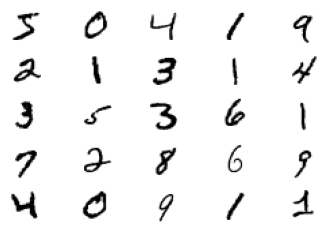

In [ ]:
import matplotlib.pyplot as plt

# plot images from the training dataset
def _plot(X):
	for i in range(25):
		# define subplot
		plt.subplot(5, 5, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(X[i], cmap='gray_r')
	plt.show()
 
_plot(trainX[:25, :])

Như vậy dữ liệu của chúng ta là những chữ số viết tay có kích thước tương đổi nhỏ, nét chữ màu đen và background màu trắng. Các chữ số đã được tiền xử lý để xuất hiện ở ngay trung tâm của ảnh.



## 5.1. Discriminator

Tiếp theo ta sẽ xác định descriminator model. Nhận xét đầu tiên đây sẽ là một mạng CNN nhận đầu vào là một bức ảnh có thể là real hoặc fake. Output sẽ gồm hai nhãn tương ứng với real và fake. Do đó chúng ta phải sử dụng activation là `sigmoid`.

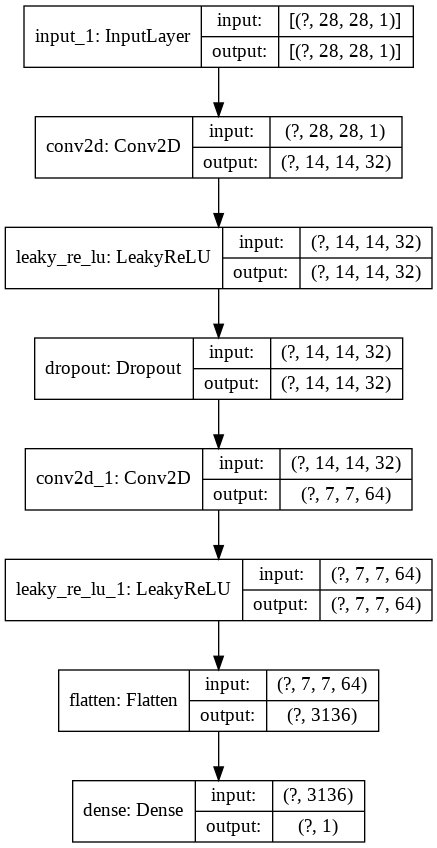

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, LeakyReLU, Dropout, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def _discriminator():
  # Khai báo các layers
  inpt = Input(shape=(28, 28, 1))
  conv1 = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same')(inpt)
  act_leak1 = LeakyReLU(alpha=0.3)(conv1)
  dropout = Dropout(0.4)(act_leak1)
  conv2 = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(dropout)
  act_leak2 = LeakyReLU(alpha=0.3)(conv2)
  flat = Flatten()(act_leak2)
  den = Dense(1, activation='sigmoid')(flat)
  # Khởi tạo model
  model = Model(inputs = [inpt], outputs = [den])
  # Compile với optimizer
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

discriminator = _discriminator()
plot_model(discriminator, show_shapes=True)

## 5.2. Generator

Generator sẽ là một mô hình sinh ảnh từ nhiễu. Nhiễu đầu vào sẽ là một véc tơ phân phối gaussian với trung bình bằng 0 và phương sai bằng 1. Chúng ta sẽ reshape khối này về một tensor3D có kích thước là `7x7` và sử dụng [mạng giải chập](https://phamdinhkhanh.github.io/2020/06/10/ImageSegmention.html#5-m%E1%BA%A1ng-gi%E1%BA%A3i-ch%E1%BA%ADp-deconvolutional-neural-network) để giải chập về kích thước `28x28`. Mạng giải chập là một tiến trình ngược với tích chập và rất hiệu quả trong các bài toán sinh ảnh.



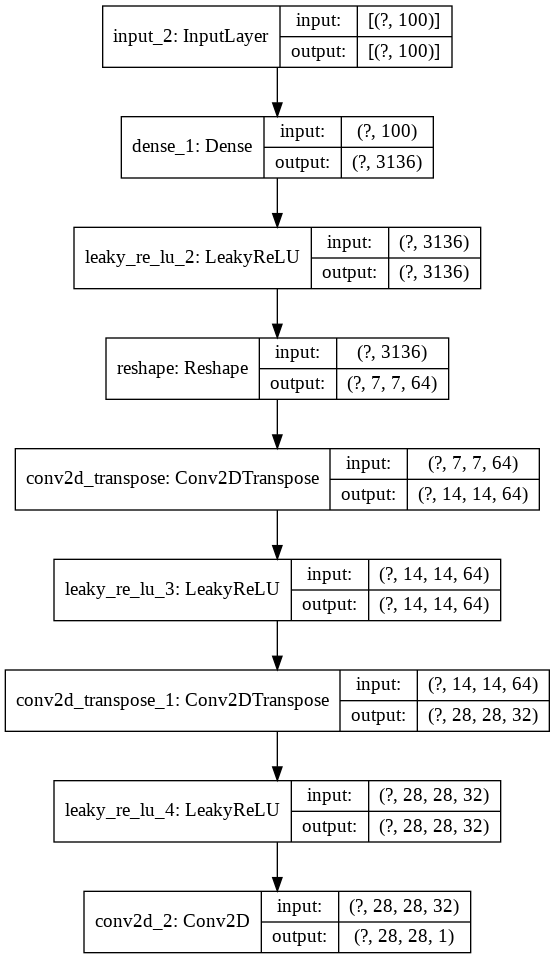

In [ ]:
from tensorflow.keras.layers import Conv2DTranspose

def _generator(noise_size = 100):
  n_units = 64*7*7
  inpt = Input(shape=(noise_size))
  den1 = Dense(n_units)(inpt)
  act_leak1 = LeakyReLU(alpha=0.3)(den1)
  reshape = Reshape((7,7,64))(act_leak1)
  con2DTran1 = Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding='same')(reshape)
  act_leak2 = LeakyReLU(alpha=0.3)(con2DTran1)
  con2DTran2 = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding='same')(act_leak2)
  act_leak3 = LeakyReLU(alpha=0.3)(con2DTran2)
  con = Conv2D(filters=1, kernel_size=(28, 28), activation='sigmoid', padding='same')(act_leak3)

  # Khởi tạo model
  model = Model(inputs = [inpt], outputs = [con])
  # Compile với optimizer
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

generator = _generator(noise_size = 100)
plot_model(generator, show_shapes=True)

Như vậy mạng CNN của Generator sẽ có các CNN layers theo thứ tự ngược lại so với Discriminator.

## 5.3. GAN model

Tiếp theo ta sẽ khởi tạo model GAN là kết hợp giữa Discriminator và Generator

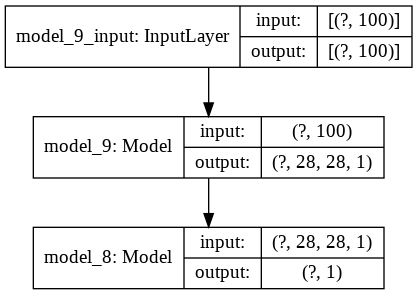

In [ ]:
from tensorflow.keras.models import Sequential

def _gan(g_model, d_model):
  # Đóng băng weight của discriminator
	d_model.trainable = False
	# Khởi tạo model GAN
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# Khai báo số chiều của noise véc tơ input của generator.
latent_dim = 100
# Khởi tạo discriminator và generatator model
d_model = _discriminator()
g_model = _generator(latent_dim)
# Khởi tạo GAN model
gan_model = _gan(g_model, d_model)
plot_model(gan_model, show_shapes=True)

## 5.4. Chọn mẫu real và fake

Để quá trình hội tụ nhanh hơn thì chúng ta sẽ chuẩn hóa các giá trị của input về [0, 1] bằng cách chia giá trị của mỗi pixel cho 255.

In [ ]:
def _normalize():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	X = np.expand_dims(trainX, axis=-1)
	X = X.astype('float32')
	X = X / 255.0
	return X

Dữ liệu fake sẽ được sinh một cách ngẫu nhiên từ một véc tơ có kích thước là `latent_dim`. Nhãn của dữ liệu fake sẽ được gán là 0.

In [ ]:
import numpy as np

# Hàm sinh batch input là noise véc tơ cho generator
def generate_latent_points(latent_dim, n_samples):
	# khởi tạo input ngẫu nhiên
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape về batch
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 

# Hàm sinh batch cho fake sample, nhãn của fake sample là 0
def generate_fake_samples(g_model, latent_dim, n_samples):
	# sinh batch là các noise véc tơ
	x_input = generate_latent_points(latent_dim, n_samples)
	# dự báo outputs từ g_model
	X = g_model.predict(x_input)
	# khởi tạo y = 0 với nhãn fake
	y = np.zeros((n_samples, 1))
	return X, y

Tiếp theo chúng ta sẽ tạo batch cho những ảnh real. Dữ liệu được lấy ngẫu nhiên từ tập dataset và nhãn của dữ liệu real là 1.

In [ ]:
def generate_real_samples(dataset, n_samples):
	# lựa chọn index ngẫu nhiên để lựa chọn batch
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# trích suất các ảnh từ dataset
	X = dataset[ix]
	# khởi tạo y = 1 với nhãn real
	y = np.ones((n_samples, 1))
	return X, y

## 5.5. Huấn luyện model

Tiếp theo chúng ta sẽ huấn luyện xen kẽ Discriminator và Generator:

* Step 1: Huấn luyện Discriminator. Chúng ta sẽ tạo ra một batch sao cho một nửa là real nhãn 1 và một nửa là fake nhãn 0. Mô hình này sẽ được huấn luyện chỉ trên Discriminator và không quan tâm đến Generator.

* Step 2: Huấn luyện Generator. Chúng ta sẽ khởi tạo dữ liệu input là những véc tơ noise. Vì mục tiêu của chúng ta là muốn Generator tạo ra ảnh giống với thật nhất nên chúng ta phải gán nhãn cho Generator là 1, nếu không nó sẽ học cách sinh ra dữ liệu giống như noise. Quá trình huấn luyện generator sẽ được cập nhật thông qua GAN model.

Quá trình học sẽ được thực hiện xen kẽ, cứ $k$ steps huấn luyện trên generator thì sẽ có 1 step huấn luyện trên discriminator.

In [ ]:
# đánh giá accuracy của discriminator trên cả tập real và tập fake
def summarize_performance(epoch, gan_model, X_real, y_real, X_fake, y_fake):
	_, acc_real = gan_model.layers[1].evaluate(X_real, y_real, verbose=0)
	_, acc_fake = gan_model.layers[1].evaluate(X_fake, y_fake, verbose=0)
	# thống kê discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256, k=2):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # Huấn luyện mô hình trên các epochs
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      if j % k == 0:
        # Step 1: Huấn luyện trên discriminator
        gan_model.layers[0].trainable = False
        gan_model.layers[1].trainable = True
        # Khởi tạo batch huấn luyện trong đó có 1/2 batch là real và 1/2 batch là fake
        X_real, y_real = generate_real_samples(dataset, half_batch)
        X_fake, y_fake = generate_fake_samples(gan_model.layers[0], latent_dim, half_batch)
        X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
        d_loss, _ = gan_model.layers[1].train_on_batch(X, y)
        print('>%d, %d/%d, d=%.3f' % (i+1, j+1, bat_per_epo, d_loss))
      
      # Step 2: Huấn luyện trên generator
      # Khởi tạo batch noise
      X_gan = generate_latent_points(latent_dim, n_batch)
      # Những dữ liệu noise này giả định là đã đánh lừa được discriminator nên được gán nhãn là 1
      y_gan = np.ones((n_batch, 1))
      # huấn luyện generator thông qua gan_model
      gan_model.layers[0].trainable = True
      gan_model.layers[1].trainable = False
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # Loss function trên discriminator, generator
      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
      # Đánh giá mô hình:
      summarize_performance(j, gan_model, X_real, y_real, X_fake, y_fake)  

In [ ]:
# train model
dataset = _normalize()
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
>92, 107/234, d=0.681, g=0.710
>Accuracy real: 52%, fake: 93%
>92, 108/234, d=0.681, g=0.701
>Accuracy real: 52%, fake: 93%
>92, 109/234, d=0.677
>92, 109/234, d=0.677, g=0.752
>Accuracy real: 12%, fake: 99%
>92, 110/234, d=0.677, g=0.737
>Accuracy real: 12%, fake: 99%
>92, 111/234, d=0.656
>92, 111/234, d=0.656, g=0.718
>Accuracy real: 38%, fake: 95%
>92, 112/234, d=0.656, g=0.714
>Accuracy real: 38%, fake: 95%
>92, 113/234, d=0.672
>92, 113/234, d=0.672, g=0.700
>Accuracy real: 53%, fake: 87%
>92, 114/234, d=0.672, g=0.691
>Accuracy real: 53%, fake: 87%
>92, 115/234, d=0.680
>92, 115/234, d=0.680, g=0.715
>Accuracy real: 30%, fake: 93%
>92, 116/234, d=0.680, g=0.708
>Accuracy real: 30%, fake: 93%
>92, 117/234, d=0.672
>92, 117/234, d=0.672, g=0.707
>Accuracy real: 42%, fake: 95%
>92, 118/234, d=0.672, g=0.713
>Accuracy real: 42%, fake: 95%
>92, 119/234, d=0.679
>92, 119/234, d=0.679, g=0.716
>Accuracy real: 31%, fake: 98%
>92, 120/23

In [ ]:
gan_model.save('gan_mnist.h5')

Vì đây là bài toán zero-sum game nên chúng ta không kỳ vọng rằng loss function của cả discriminator và generator sẽ cùng thấp. Trái lại khi loss discriminator giảm xuống, mô hình phân loại trở nên tinh vi hơn thì loss generator sẽ tăng lên do khó đánh lừa được discriminator. Ngược lại khi loss function của discriminator tăng lên, mô hình generator tạo ra dữ liệu giống thật hơn, loss function của generator sẽ giảm xuống.

Nếu bạn nhìn thấy một trong hai loss function của descriminator hoặc generator tiệm cận 0 thì đó là một dấu hiệu của mô hình GAN không tốt.

Giá trị loss function của generator và descriminator nên giao động quanh khoảng 0.7. Đây chính là giá trị hội tụ của GAN và bằng $\log(2)$. Do bài viết đã khá dài nên tôi không đưa thêm chứng minh này, xin dành cho bạn đọc như một bài tập nâng cao.


## 5.6. Đánh giá mô hình

Để ý ở phần code huấn luyện mô hình ta thêm một đoạn code sau để đánh giá độ chính xác của mô hình trên từng batch real và fake.

In [ ]:
# đánh giá accuracy của discriminator trên cả tập real và tập fake
def summarize_performance(epoch, gan_model, X_real, y_real, X_fake, y_fake):
	_, acc_real = gan_model.layers[1].evaluate(X_real, y_real, verbose=0)
	_, acc_fake = gan_model.layers[1].evaluate(X_fake, y_fake, verbose=0)
	# thống kê discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

Chúng ta kỳ vọng rằng giá trị của accuracy trên cả real và fake giao động xung quanh giá trị 50%. Điều đó có nghĩa là gì? Chúng ta có khoảng 50% dữ liệu real được dự đoán nhầm thành fake và chúng ta có khoảng 50% dữ liệu fake được dự đoán thành real. Như vậy generator đã sinh ra ảnh fake khá giống thật và khiến cho đôi lúc discriminator phân biệt được giữa real và fake và đôi lúc không phân biệt được.

Trái lại nếu giá trị accuracy của real quá cao hoặc accuracy của fake quá cao, điều đó chứng tỏ generator chưa đủ tốt để đánh lừa được discriminator. Chính vì vậy nếu bạn nhìn thấy accuracy của mô hình trên real hoặc fake là 100% thì không nên vui mừng nhé, đó là một kết quả khá kém của mô hình.

## 5.7. Dự báo

Sau khi huấn luyện mô hình chúng ta sẽ dự báo các mẫu được sinh ra:

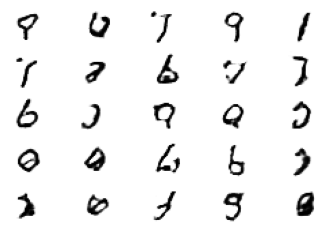

In [ ]:
X_eval, y_eval = generate_fake_samples(g_model=gan_model.layers[0], latent_dim=100, n_samples=25)

_plot(X_eval[:, :, :, 0])

Ta thấy dữ liệu sinh ra cũng khá giống chứ chưa hoàn toàn giống 100%. Kỹ thuật được sử dụng trong model GAN đầu tiên còn nhiều hạn chế nên ảnh sinh ra khá dễ phân biệt real và fake. Giai đoạn sau model GAN ngày càng được cải tiến đặc biệt là việc thay đổi input từ noise sang ảnh giúp generator học được các đặc trưng từ ảnh input ngay từ đầu và sinh ra ảnh tự nhiên hơn. Hơn nữa mô hình không bị giới hạn sinh ra ảnh là các nhãn trong tập huấn luyện mà còn sinh ra một ảnh bất kỳ dựa trên ảnh input.

# 6. Tổng kết

Như vậy các bạn đã tìm hiểu xong lý thuyết của model GAN. Mình xin tổng kết lại một số điểm chính:

* Ý tưởng của GAN dựa trên bài toán zero-sum game của lý thuyết trò chơi. Hai người chơi có lợi ích xung đột là Generator và Discriminator.

* Generator có mục tiêu là sinh ra bức ảnh giống với ảnh thật nhất. Đầu vào của Generator (trong kiến trúc GAN đầu tiên năm 2014) là một nhiễu được khởi tạo ngẫu nhiên.

* Discriminator có mục tiêu là phân biệt ảnh giả sinh ra từ Generator với ảnh thật.

* Hàm loss function lồng ghép đồng thời loss function của Generator và Discriminator. Loss function về bản chất vẫn là một hàm cross entropy của bài toán phân loại nhị phân.

* Quá trình huấn luyện GAN sẽ xen kẽ giữa Discriminator và Generator. Chúng ta sẽ huấn luyện trước Discriminator với $k$ steps và cố định hệ số mô hình của Generator. Sau đó chúng ta huấn luyện Generator và cố định Discriminator.

Ngoài ra GAN còn rất nhiều các biến thể khác như Wasserstein GAN, StarGAN, StyleGAN, SRGAN, CycleGAN, Pix2pix, BigGAN,.... rất rất nhiều các mô hình GAN khác chưa được liệt kê hết và vẫn đang tiếp tục được phát triển. Mình sẽ hướng dẫn các bạn ở những bài sau.



# 7. Tài liệu

1. [Generative Adversarial Networks, Ian J. Goodfellow](https://arxiv.org/abs/1406.2661)

2. [Wasserstein GAN, Martin Arjovsky](https://arxiv.org/pdf/1701.07875.pdf)

3. [Deep Learning Lectures, Generative Adversarial Networks](https://www.youtube.com/watch?v=wFsI2WqUfdA&list=PLqYmG7hTraZCDxZ44o4p3N5Anz3lLRVZF&index=10&t=0s)

4. [GAN model, machinelearningmastery](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

5. [impressive applications of GAN, machinelearningmastery](https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/)

6. [GAN model train on mnist, machinelearningmastery](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/)